# Task 1

In [2]:
#Using historical stock price data for multiple companies, create an interactive plot to analyze trends and patterns over time. 
#Include the following features:
# Line plots for stock prices of three different companies over a year.
# Highlight significant events or anomalies with annotations.
# Add a moving average line to smooth out short-term fluctuations and highlight longer-term trends.

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("GOOGL.csv")
df1=pd.read_csv("AAPL.csv")
df2=pd.read_csv("NVDA.csv")

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,147.511786,149.036984,146.229920,147.705476,147.560985,2.797381e+07
std,18.268475,18.403892,18.159630,18.303449,18.329374,1.060895e+07
min,121.360001,123.000000,120.209999,121.529999,121.390678,1.024210e+07
25%,133.665000,135.535004,132.157505,134.062500,133.908814,2.155822e+07
50%,139.645004,141.595001,138.839996,140.299995,140.139160,2.522480e+07
75%,157.092506,159.322506,156.325001,157.862496,157.681526,3.020142e+07
max,190.309998,191.750000,189.029999,191.179993,191.179993,8.436620e+07


In [4]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,186.324087,187.948254,184.788611,186.396825,185.984207,6.038856e+07
std,14.993327,15.170131,14.712436,14.976953,15.093254,2.465979e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277497,177.052502,173.700004,175.370007,174.801845,4.727445e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502815,5.377700e+07
75%,192.592502,194.017498,191.494999,192.542500,192.067955,6.604168e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [5]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,71.405770,72.628873,70.016429,71.399238,71.391223,4.571428e+08
std,29.012734,29.583191,28.250264,28.923183,28.925785,1.531170e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.739110e+08
25%,46.183999,47.015250,45.319750,46.551251,46.543262,3.663902e+08
50%,60.176501,61.057001,59.504000,60.451999,60.444201,4.317830e+08
75%,90.039499,91.325253,88.408751,90.357752,90.350328,5.220410e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.156044e+09


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['month_year'] = df['Date'].dt.to_period('M')
monthly_data = df.groupby('month_year')['Close'].max().reset_index()
monthly_data['month_year'] = monthly_data['month_year'].dt.to_timestamp()

In [7]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['month_year'] = df1['Date'].dt.to_period('M')
monthly_data1 = df1.groupby('month_year')['Close'].max().reset_index()
monthly_data1['month_year'] = monthly_data1['month_year'].dt.to_timestamp()

In [8]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['month_year'] = df2['Date'].dt.to_period('M')
monthly_data2 = df2.groupby('month_year')['Close'].max().reset_index()
monthly_data2['month_year'] = monthly_data2['month_year'].dt.to_timestamp()

In [9]:
monthly_data.tail()

,month_year,Close
8,2024-03-01,150.929993
9,2024-04-01,171.949997
10,2024-05-01,177.850006
11,2024-06-01,185.410004
12,2024-07-01,191.179993


In [10]:
monthly_data2.tail()

,month_year,Close
8,2024-03-01,95.001999
9,2024-04-01,90.615997
10,2024-05-01,114.824997
11,2024-06-01,135.580002
12,2024-07-01,134.910004


In [11]:
monthly_data1.tail()

,month_year,Close
8,2024-03-01,179.660004
9,2024-04-01,176.550003
10,2024-05-01,192.350006
11,2024-06-01,216.669998
12,2024-07-01,234.820007


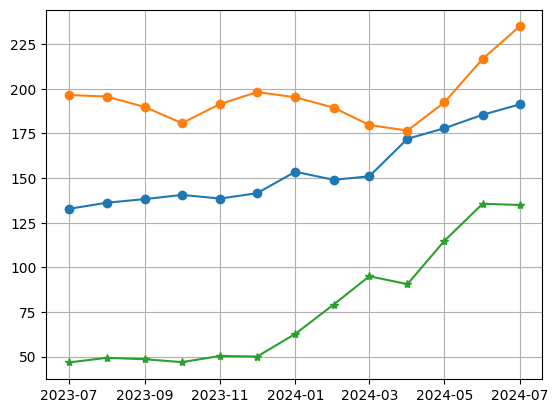

In [12]:
plt.plot(monthly_data['month_year'], monthly_data['Close'], marker='o')
plt.plot(monthly_data1['month_year'], monthly_data1['Close'], marker='o')
plt.plot(monthly_data2['month_year'], monthly_data2['Close'], marker='*')
plt.grid()
plt.show()

# Task 2

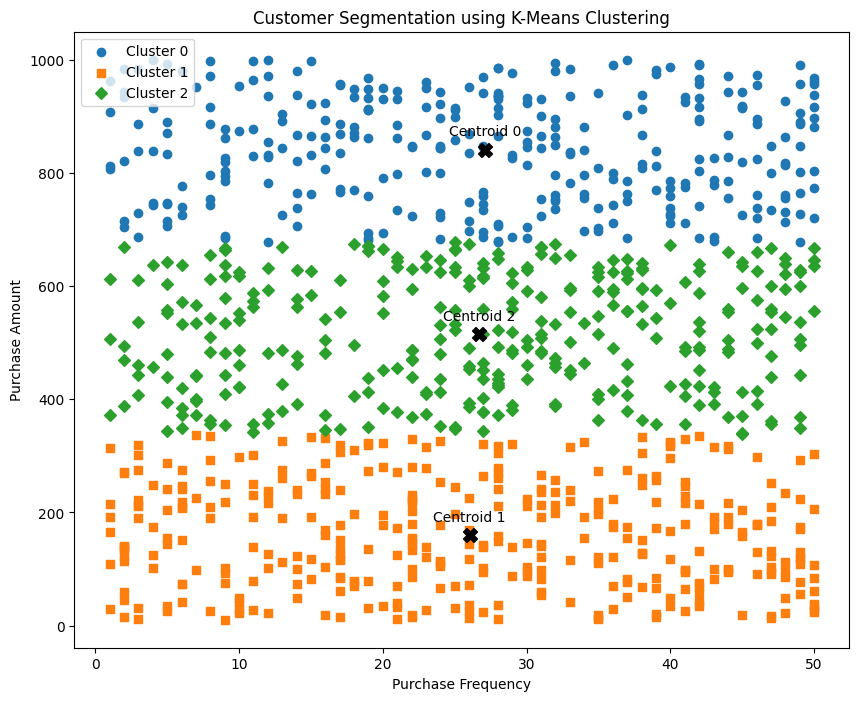

In [13]:
#Visualize the results of a customer segmentation analysis using K-Means clustering. 
#Use a dataset of customer purchase behavior, and create scatter plots to display clusters.
# Include:
# Scatter plots of customers segmented into different clusters based on purchase frequency and amount.
# Distinguish clusters with different colors and markers.
# Annotate centroids of each cluster.


import pandas as pd
file_path = 'customer_segmentation_data.csv'
data = pd.read_csv(file_path)
features = data[['purchase_frequency', 'last_purchase_amount']]
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)
data['Cluster'] = kmeans.labels_

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
markers = ['o', 's', 'D']
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['purchase_frequency'], cluster_data['last_purchase_amount'],
                label=f'Cluster {i}', marker=markers[i])

centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=100, c='black', marker='X')
    plt.annotate(f'Centroid {i}', (centroid[0], centroid[1]), textcoords='offset points', xytext=(0,10), ha='center')

plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Amount')
plt.title('Customer Segmentation using K-Means Clustering')
plt.legend()
plt.show()

# Task 3

In [23]:
# Create a dashboard to visualize sales performance across different regions and product categories.
# Include:
# Bar charts showing total sales per region.
# Stacked bar charts to break down sales by product categories.
# A line plot for monthly sales trends over the past year.

df=pd.read_csv("salesdata.csv",parse_dates=['order_date'])
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

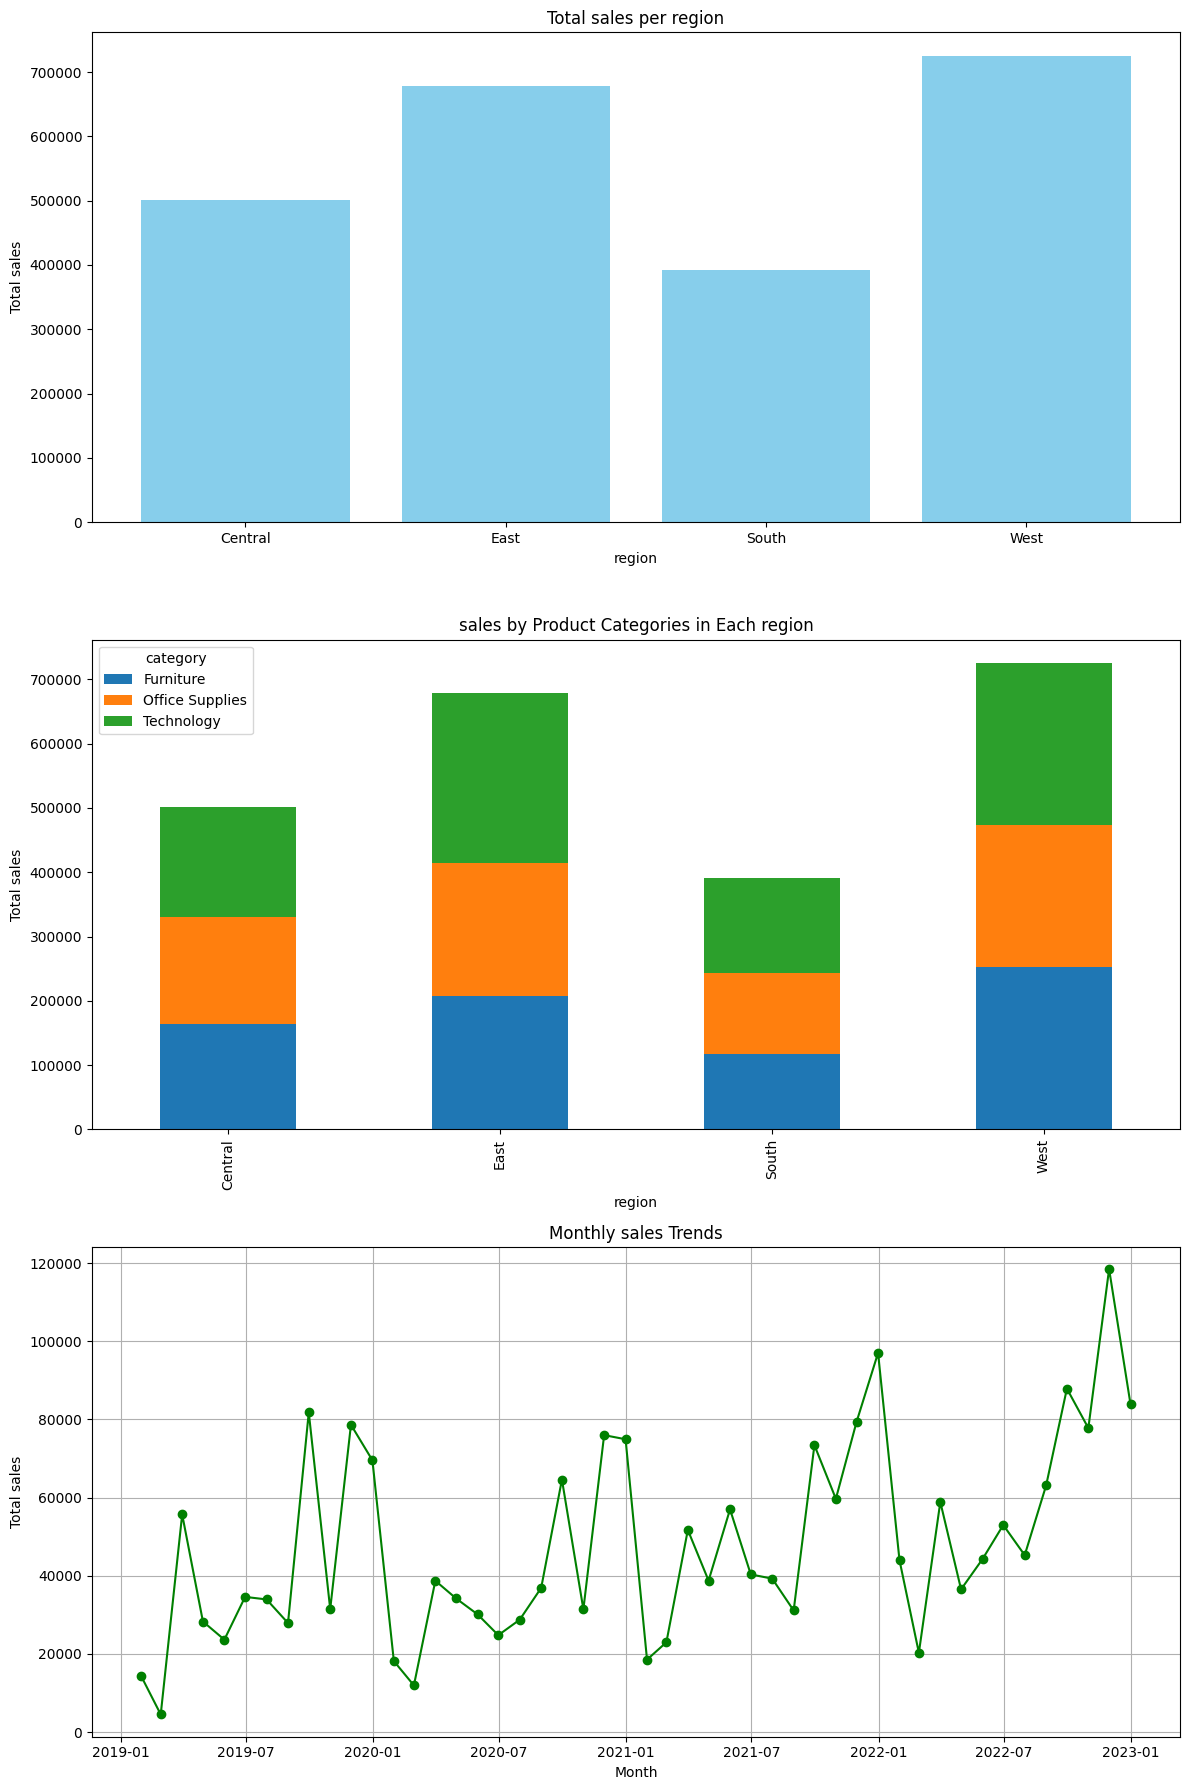

In [25]:
df.columns = [col.strip() for col in df.columns]

total_sales_per_region = df.groupby('region')['sales'].sum()

sales_by_category_region = df.groupby(['region', 'category'])['sales'].sum().unstack()

df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales_trends = df.resample('M', on='order_date')['sales'].sum()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

axes[0].bar(total_sales_per_region.index, total_sales_per_region.values, color='skyblue')
axes[0].set_title('Total sales per region')
axes[0].set_xlabel('region')
axes[0].set_ylabel('Total sales')

sales_by_category_region.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('sales by Product Categories in Each region')
axes[1].set_xlabel('region')
axes[1].set_ylabel('Total sales')
axes[1].legend(title='category')

axes[2].plot(monthly_sales_trends.index, monthly_sales_trends.values, marker='o', linestyle='-', color='green')
axes[2].set_title('Monthly sales Trends')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total sales')
axes[2].grid(True)

plt.tight_layout()

plt.show()

# Task 4

In [15]:
# Analyze and visualize the distribution of real estate prices in different neighborhoods of a city.
# Use a dataset of real estate listings and create:
# A histogram to show the price distribution.
# A box plot to compare price distributions across different neighborhoods.
# Scatter plots to show the relationship between property size and price.

df=pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,LotArea,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
sc=df[['GrLivArea','SalePrice','Neighborhood']]

In [17]:
sc.head()

,GrLivArea,SalePrice,Neighborhood
0,1656,215000,NAmes
1,896,105000,NAmes
2,1329,172000,NAmes
3,2110,244000,NAmes
4,1629,189900,Gilbert


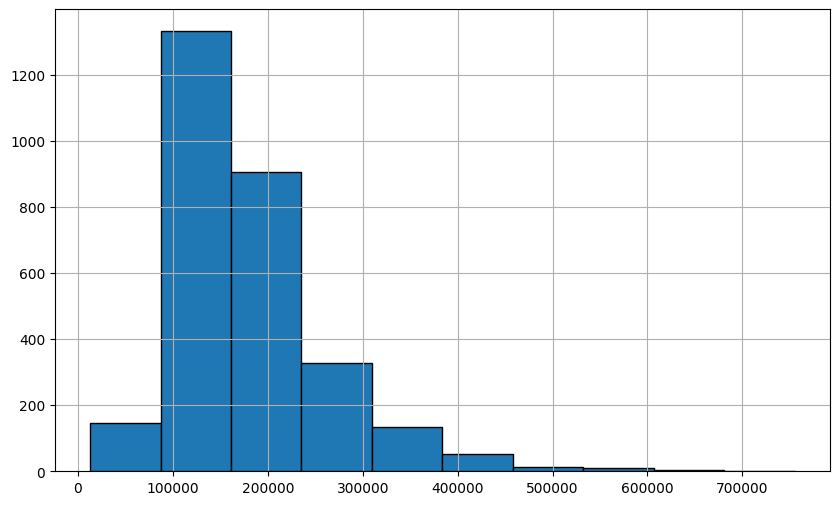

In [18]:
plt.figure(figsize=(10,6))
plt.hist(sc.SalePrice,edgecolor="k")
plt.grid()

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

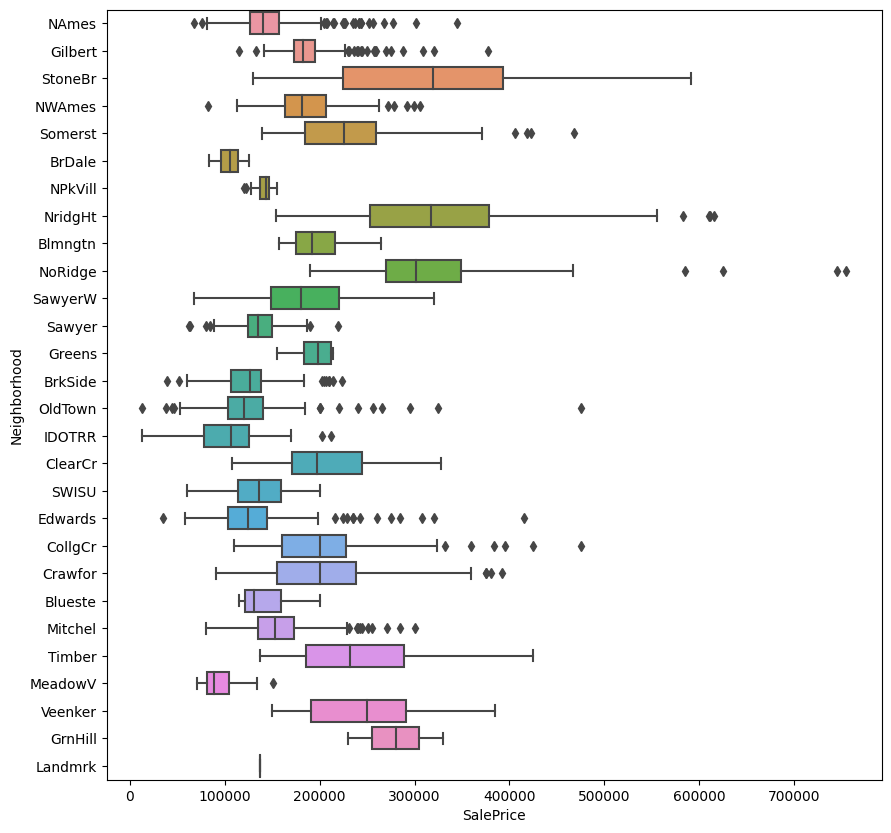

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.boxplot(x=sc.SalePrice,y=sc.Neighborhood)

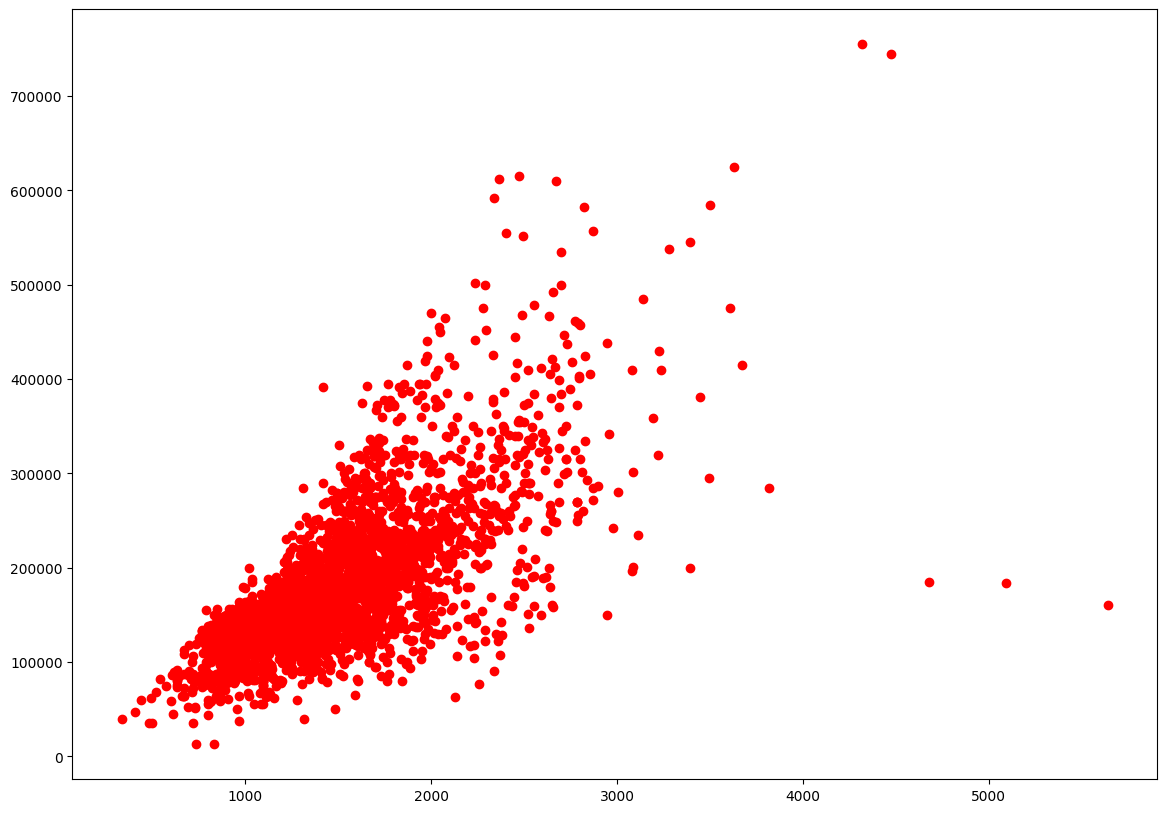

In [20]:
plt.figure(figsize=(14,10))
plt.scatter(sc.GrLivArea,sc.SalePrice,color="r")
plt.show()